In [1]:
# 기본 설정
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams["font.family"] = "NanumGothic"
plt.rcParams["axes.unicode_minus"] = False

In [2]:
# 데이터 불러오기
df = pd.read_csv("../data/cleaned_apt_trades_mapo_2024.csv")
df.head()

,apt_name,district,road_address,price,area_m2,floor,year_built,contract_date,address,lat,lng
0,마포그랑자이,대흥동,대흥로 175,170000,84.9800,17,2020,2024-01-17,서울 마포구 대흥로 175,37.555771,126.943355
1,벽산솔렌스힐,신수동,광성로 28,99400,84.9619,8,2007,2024-01-06,서울 마포구 광성로 28,37.549286,126.936153
2,DMC마포청구아파트,중동,성암로11길 60,82000,84.9000,1,1994,2024-01-27,서울 마포구 성암로11길 60,37.574428,126.901749
3,마포래미안푸르지오3단지,아현동,마포대로 195,133000,59.9452,2,2014,2024-01-21,서울 마포구 마포대로 195,37.552434,126.954224
4,한강2차대주피오레,망원동,동교로3길 115,70000,84.9700,14,2003,2024-01-30,서울 마포구 동교로3길 115,37.555004,126.898359


In [3]:
# 기본 정보 확인
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2679 entries, 0 to 2678
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   apt_name       2679 non-null   object 
 1   district       2679 non-null   object 
 2   road_address   2679 non-null   object 
 3   price          2679 non-null   int64  
 4   area_m2        2679 non-null   float64
 5   floor          2679 non-null   int64  
 6   year_built     2679 non-null   int64  
 7   contract_date  2679 non-null   object 
 8   address        2679 non-null   object 
 9   lat            2679 non-null   float64
 10  lng            2679 non-null   float64
dtypes: float64(3), int64(3), object(5)
memory usage: 230.4+ KB


,price,area_m2,floor,year_built,lat,lng
count,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000,2679.000000
mean,128962.958193,76.448641,10.204181,2006.350504,37.552521,126.934875
std,47234.054138,23.769644,6.376749,9.545807,0.010727,0.021050
min,14000.000000,12.810000,1.000000,1970.000000,37.535963,126.878171
25%,98000.000000,59.873600,5.000000,2000.000000,37.544712,126.924865
50%,125000.000000,84.388400,9.000000,2005.000000,37.550925,126.943285
75%,159000.000000,84.957200,14.000000,2014.000000,37.555771,126.951191
max,335000.000000,191.872000,38.000000,2023.000000,37.587757,126.960979


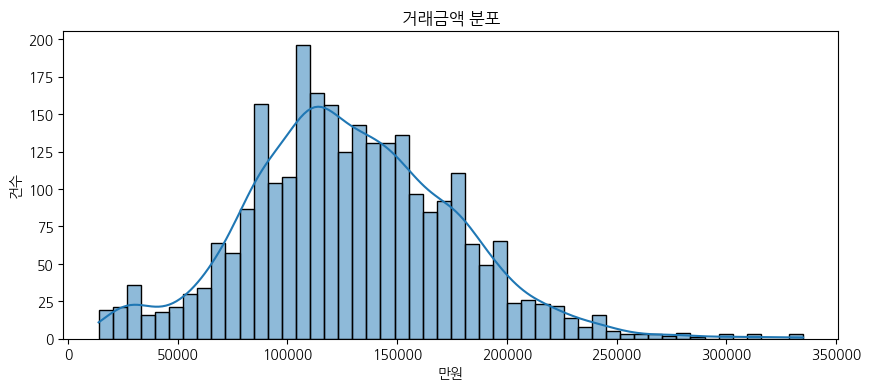

In [4]:
# 거래금액 분포 시각화
plt.figure(figsize=(10, 4))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("거래금액 분포")
plt.xlabel("만원")
plt.ylabel("건수")
plt.show()

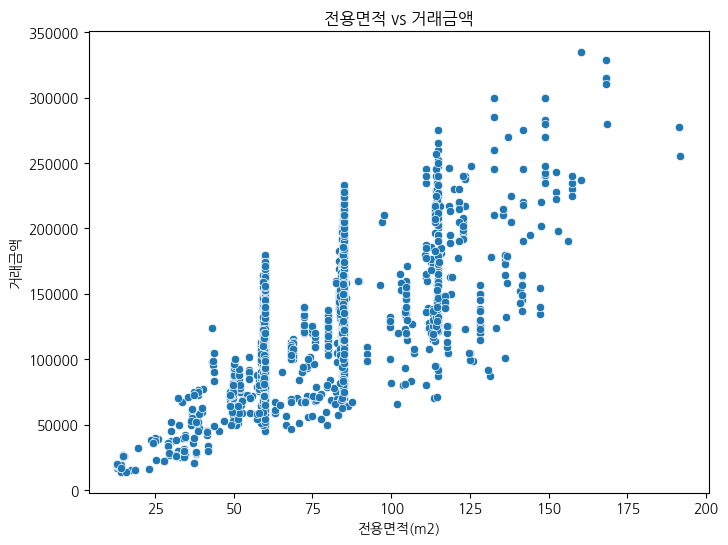

In [5]:
# 전용면적 vs 거래금액 (산점도)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="area_m2", y="price", data=df)
plt.title("전용면적 vs 거래금액")
plt.xlabel("전용면적(m2)")
plt.ylabel("거래금액")
plt.show()

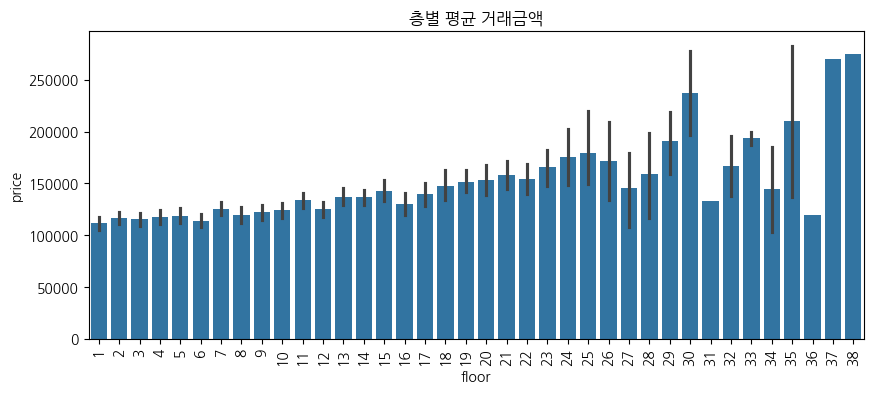

In [6]:
# 층별 평균 거래금액
plt.figure(figsize=(10, 4))
sns.barplot(x="floor", y="price", data=df)
plt.title("층별 평균 거래금액")
plt.xticks(rotation=90)
plt.show()

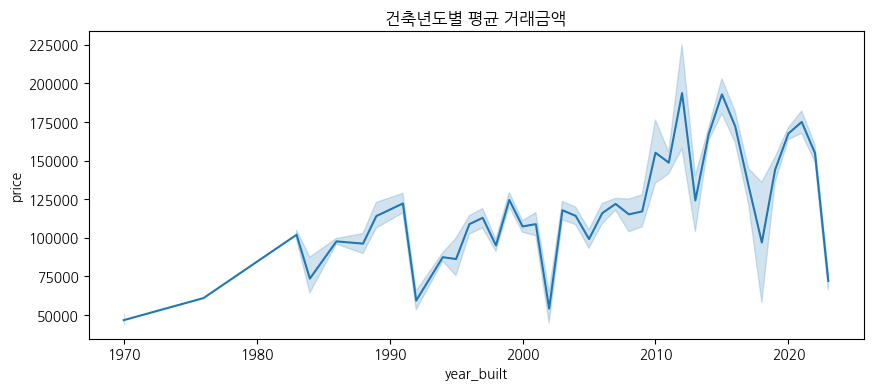

In [7]:
# 건축년도별 평균 거래금액
plt.figure(figsize=(10, 4))
sns.lineplot(x="year_built", y="price", data=df)
plt.title("건축년도별 평균 거래금액")
plt.show()

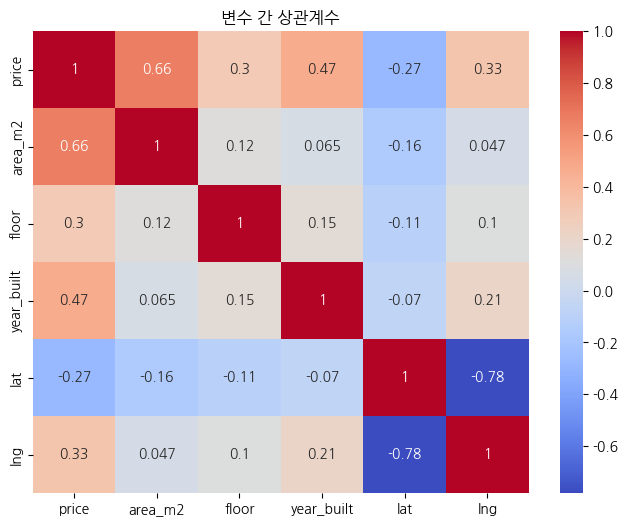

In [8]:
# 상관관계 히트맵
plt.figure(figsize=(8, 6))
sns.heatmap(
    df[["price", "area_m2", "floor", "year_built", "lat", "lng"]].corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title("변수 간 상관계수")
plt.show()

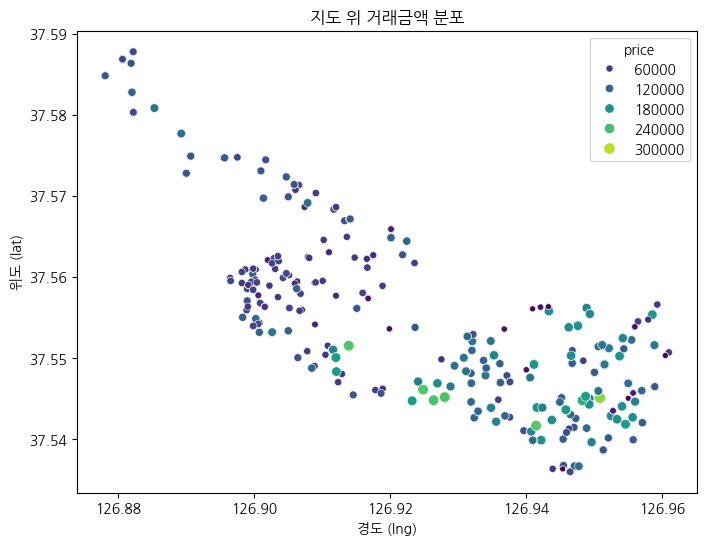

In [9]:
# 지리적 위치 vs 거래금액 (산점도)
plt.figure(figsize=(8, 6))
sns.scatterplot(x="lng", y="lat", hue="price", size="price", data=df, palette="viridis")
plt.title("지도 위 거래금액 분포")
plt.xlabel("경도 (lng)")
plt.ylabel("위도 (lat)")
plt.show()